In [0]:
# Regresión lineal usando el dataset de presión sanguínea vs. edad y usando la
# librería Keras.
# Tomado de: http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html
# 
# codificandobits.com - 2018


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD,RMSprop

In [0]:
#
# Lectura y visualización del set de datos
#

datos = pd.read_csv('Advertising.csv')
datos.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [0]:
# Al graficar los datos se observa una tendencia lineal
""""datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()
"""

'"datos.plot.scatter(x=\'Age\', y=\'Systolic blood pressure\')\nplt.xlabel(\'Edad (años)\')\nplt.ylabel(\'Presión sistólica (mm de Mercurio)\')\nplt.show()\n'

In [0]:
x = datos[["TV","Radio","Newspaper"]] #dato.iloc[:,0:3]
y = datos['Sales']



In [0]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [0]:
x.shape

(200, 3)

In [0]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [0]:
#
# Construir el modelo en Keras
#

# - Capa de entrada: 1 dato (cada dato "x" correspondiente a la edad)
# - Capa de salida: 1 dato (cada dato "y" correspondiente a la regresión lineal)
# - Activación: 'linear' (pues se está implementando la regresión lineal)
#np.random.seed(2)# Para reproducibilidad del entrenamiento


modelo = Sequential()
modelo.add(Dense(2, input_dim=3, kernel_initializer='uniform', activation='linear'))
modelo.add(Dense(1, activation='linear'))

In [0]:
# Definición del método de optimización (gradiente descendiente), con una
# tasa de aprendizaje de 0.0004 y una pérdida igual al error cuadrático
# medio


modelo.compile(loss='mean_squared_error', optimizer=RMSprop())


In [0]:
# Imprimir en pantalla la información del modelo
#modelo.summary()


In [0]:
#
# Entrenamiento: realizar la regresión lineal
#

# 1000 iteraciones y todos los datos de entrenamiento (29) se usarán en cada
# iteración (batch_size = 29)

num_epochs =2000
batch_size = 10
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)


Text(0.5, 1.0, 'ECM vs. epochs')

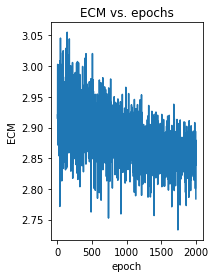

In [0]:
# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')


In [0]:
y.shape

(200,)

In [0]:
# Calcular y graficar la predicción
y_regr = modelo.predict(x)
print(y_regr[:5])



[[20.569567]
 [12.333909]
 [12.292909]
 [17.626745]
 [13.184096]]


In [0]:
from sklearn.metrics import r2_score
r2_score(y,y_regr)

0.8971562644858398

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
mrf = RandomForestRegressor(n_estimators=100)

In [0]:
mrf.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_rf = mrf.predict(x)

In [0]:
from sklearn.metrics import r2_score
r2_score(y,y_rf)

0.9972837544843125